In [1]:
from rdkit import Chem, DataStructs 
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

In [2]:
def compute_similarity(smiles_list, atom_nums, metric, normalize=False):
    """Compute pairwise similarity to the final compound."""
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, useChirality=True, useFeatures=True) for mol in mols]
    similarities = []

    ref_fp = fps[-1]
    ref_atom_num = atom_nums.iloc[-1]

    for i, fp in enumerate(fps):
        if metric == "dice":
            sim = DataStructs.DiceSimilarity(fp, ref_fp)
        elif metric == "tanimoto":
            sim = DataStructs.TanimotoSimilarity(fp, ref_fp)
        else:
            raise ValueError("Invalid similarity metric. Choose 'dice' or 'tanimoto'.")

        if normalize and atom_nums[i] > 0:
            sim *= ref_atom_num / atom_nums[i]
        similarities.append(sim)

    return similarities

def getsimi_df(filename, metric, normalize=False):
    df = pd.read_csv(filename)
    df["Atom_num"] = [Chem.MolFromSmiles(smi).GetNumAtoms() for smi in df["Compound"]]
    df["Similarity"] = compute_similarity(df["Compound"], df["Atom_num"], metric=metric, normalize=normalize)
    return df



### Stemoamide Tanimoto Similarity

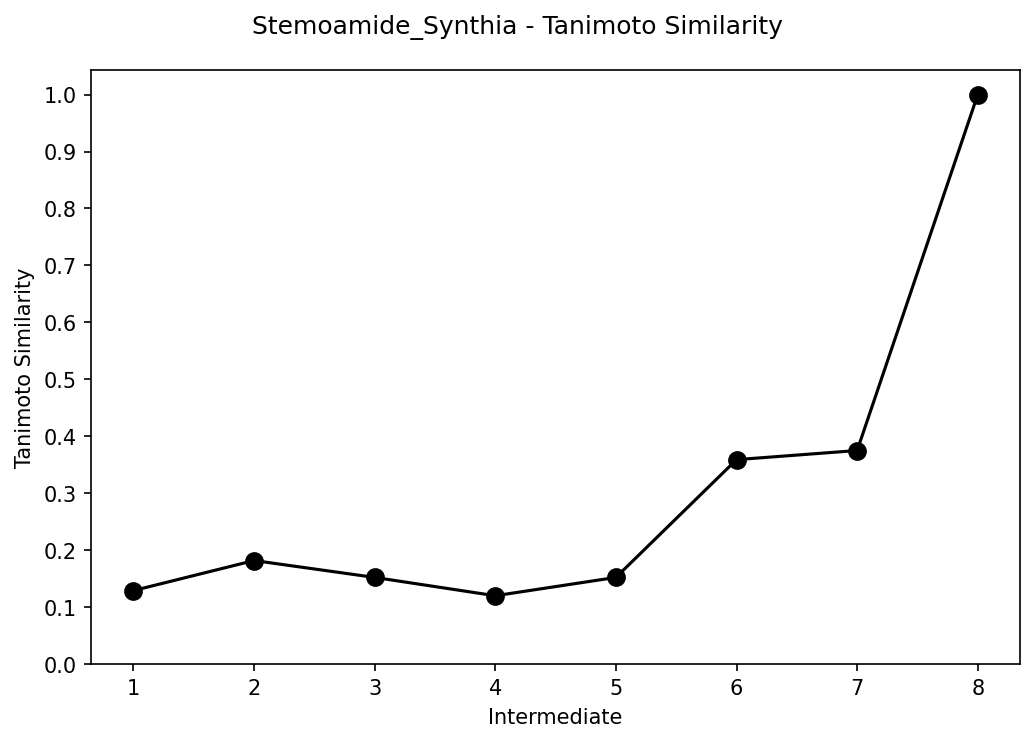

In [3]:
# === CONFIG ===
filename = "Stemoamide_Synthia.csv"
similarity_metric = "tanimoto"       # "dice" or "tanimoto"
normalize = True if similarity_metric == "dice" else False
title_suffix = "Normalized Dice" if normalize else "Tanimoto"

# === RUN ===
df = getsimi_df(filename, metric=similarity_metric, normalize=normalize)

# === PLOT ===
plt.figure(figsize=(7, 5), dpi=150)
plt.plot(df["Similarity"], 'ko-', markersize=8, label=title_suffix)
plt.xticks(np.arange(len(df)), np.arange(1, len(df) + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Intermediate")
plt.ylabel("Tanimoto Similarity")
plt.suptitle(f"{filename.replace('.csv', '')} - {title_suffix} Similarity")
plt.tight_layout()
plt.show()

### Gelsemine Normalized Dice Similarity

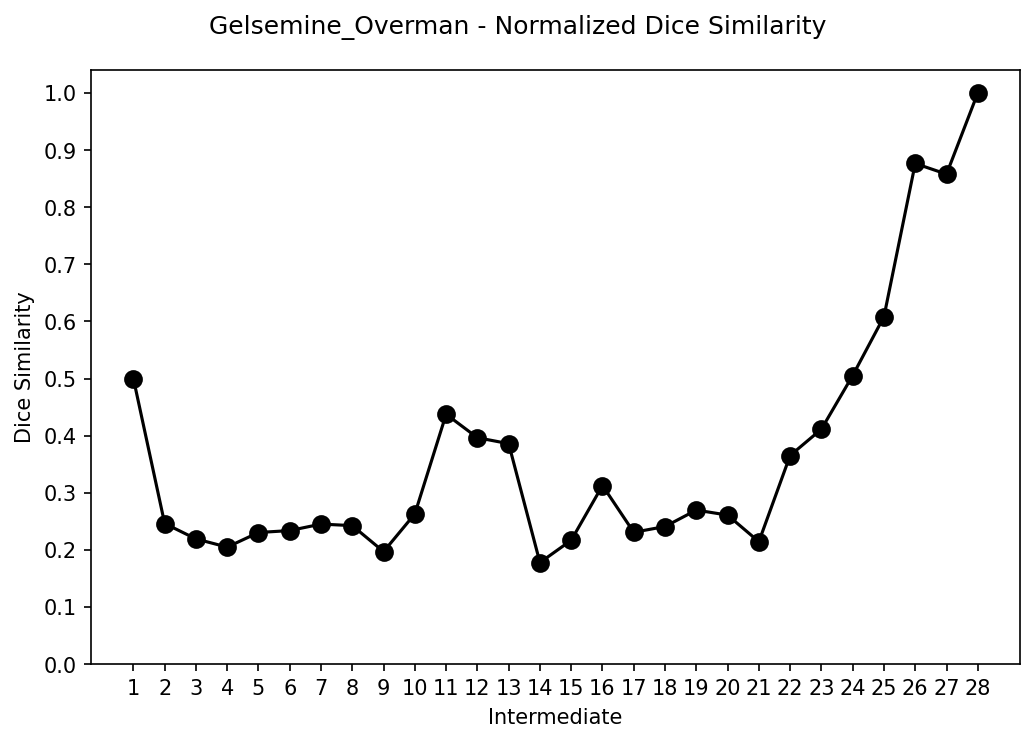

In [4]:
# === CONFIG ===
filename = "Gelsemine_Overman.csv"
similarity_metric = "dice"       # "dice" or "tanimoto"
normalize = True if similarity_metric == "dice" else False
title_suffix = "Normalized Dice" if normalize else "Tanimoto"

# === RUN ===
df = getsimi_df(filename, metric=similarity_metric, normalize=normalize)

# === PLOT ===
plt.figure(figsize=(7, 5), dpi=150)
plt.plot(df["Similarity"], 'ko-', markersize=8, label=title_suffix)
plt.xticks(np.arange(len(df)), np.arange(1, len(df) + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Intermediate")
plt.ylabel("Dice Similarity")
plt.suptitle(f"{filename.replace('.csv', '')} - {title_suffix} Similarity")
plt.tight_layout()
plt.show()